## Step 1: Data Loading and Cleaning

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [166]:
#load data
df = pd.read_csv("..\data\heart_disease_health_indicators_uncleaned.csv")

#checking missing values
print(df.isnull().sum())

#dropping duplicates
df = df.drop_duplicates()

#checking target variable distribution
print(df["HeartDiseaseorAttack"].value_counts())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
HeartDiseaseorAttack
0    206050
1     23712
Name: count, dtype: int64


## Step 2: Descriptive Statistics

### A. Central Tendency & Dispersion

In [170]:
#for numerical variables
print(df[["BMI", "Age"]].describe())

#for categoriccal variables
print(df["HeartDiseaseorAttack"].value_counts(normalize=True))
print(df["Smoker"].value_counts(normalize=True))

                 BMI            Age
count  229762.000000  229762.000000
mean       28.685818       8.086672
std         6.786308       3.093792
min        12.000000       1.000000
25%        24.000000       6.000000
50%        27.000000       8.000000
75%        32.000000      10.000000
max        98.000000      13.000000
HeartDiseaseorAttack
0    0.896798
1    0.103202
Name: proportion, dtype: float64
Smoker
0    0.534318
1    0.465682
Name: proportion, dtype: float64


### B. Quantiles & Outliers

In [173]:
#Checking BMI distribution (IQR method)
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["BMI"] < lower_bound) | (df["BMI"] > upper_bound)]
print(f'Number of BMI Outliers: {len(outliers)}')

Number of BMI Outliers: 5637


## Step 3: Hypothesis Testing
### A. Chi-Square Test (Categorica vs. Heart Disease)
#### a. Is Smoking associated with heart disease?
#### b. Does physical activity reduce heart disease risk?
#### c. Does alchohol consumption affect heart disease risk?

In [176]:
# chi2 test for smoking vs. heart_disease
contingency_table = pd.crosstab(df["Smoker"], df["HeartDiseaseorAttack"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("a. ✅ REJECT Null: Smoking affects heart disease risk.")
else:
    print("❌ FAIL to reject Null: No significant association found.")

# chi2 test for physical_activity vs heart-disease
contingency_phy = pd.crosstab(df['PhysActivity'], df['HeartDiseaseorAttack'])
chi2_phy, p_phy, dof_phy, expected_phy = chi2_contingency(contingency_phy)
print(f"Chi-square p-value: {p_phy:.4f}")
if p_phy < 0.05:
    print("b. ✅ REJECT Null: Physical activity affects heart disease risk.")
else:
    print("❌ FAIL to reject Null: No significant association found.")

# chi2 test for alchohol-consumption vs. heart_disease
contingency_alc = pd.crosstab(df['HvyAlcoholConsump'], df['HeartDiseaseorAttack'])
chi2_alc, p_alc, dof_alc, expected_alc = chi2_contingency(contingency_alc)
print(f"Chi-square p-value: {p_alc:.4f}")
if p_alc < 0.05:
    print("c. ✅ REJECT Null: Alcohol consumption affects heart disease risk.")
else:
    print("❌ FAIL to reject Null: No significant association found.")

P-value: 0.0000
a. ✅ REJECT Null: Smoking affects heart disease risk.
Chi-square p-value: 0.0000
b. ✅ REJECT Null: Physical activity affects heart disease risk.
Chi-square p-value: 0.0000
c. ✅ REJECT Null: Alcohol consumption affects heart disease risk.


### B. T-Test (Numerical vs. HeartDisease)
#### Do people with heart disease have higher BMI?

In [179]:
heart_disease = df[df["HeartDiseaseorAttack"] == "Yes"]["BMI"]
no_heart_disease = df[df["HeartDiseaseorAttack"] == "No"]["BMI"]

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference in BMI between groups.")
else:
    print("❌ No significant difference.")

P-value: nan
❌ No significant difference.


### C. ANOVA (Multiple group vs. Heart Disease)
#### Does age group affect heart disease risk?

In [182]:
age_groups = df.groupby("Age")["HeartDiseaseorAttack"].apply(lambda x: (x == "Yes").mean())
f_stat, p_value = f_oneway(
    df[df["Age"] == "0-5"]["HeartDiseaseorAttack"] == "Yes",
    df[df["Age"] == "6-10"]["HeartDiseaseorAttack"] == "Yes",
    df[df["Age"] == "11-15"]["HeartDiseaseorAttack"] == "Yes",
    df[df["Age"] == "16-20"]["HeartDiseaseorAttack"] == "Yes",
    df[df["Age"] == "21-25"]["HeartDiseaseorAttack"] == "Yes"
)
print(f"P-value: {p_value:.4f}")

P-value: nan


C:\Users\asadr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


## Step 4: Data Visualization
### A. For Categorical Variables (Bar Plots)
#### a. Heart_disease vs. Smoking

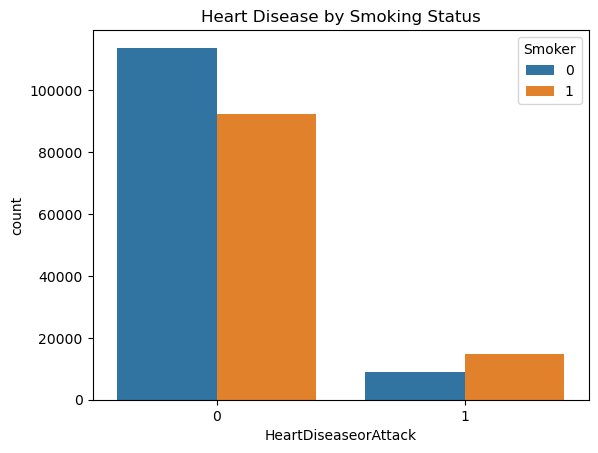

In [185]:
sns.countplot(x="HeartDiseaseorAttack", hue="Smoker", data=df)
plt.title("Heart Disease by Smoking Status")
plt.savefig('..\plots\somking_vs_heart_disease.png', dpi=300, bbox_inches="tight")
plt.show()

#### b. Physical_Activity vs. Heart_Disease

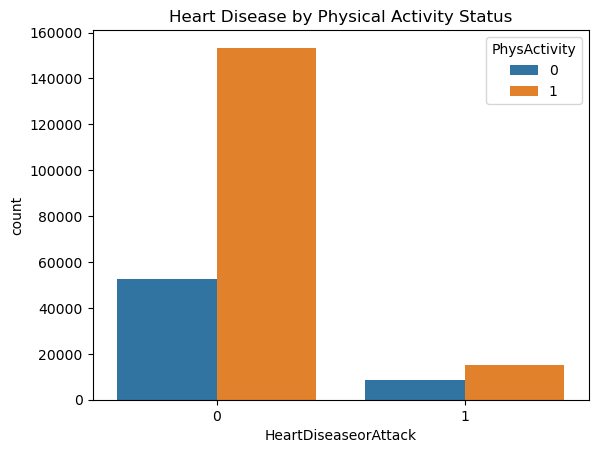

In [200]:
#plot showing Physical_Activity vs. Heart_Disease
sns.countplot(x='HeartDiseaseorAttack', hue='PhysActivity', data=df)
plt.title("Heart Disease by Physical Activity Status")
plt.savefig('..\plots\physical_activity_vs_heart_disease.png', dpi=300, bbox_inches="tight")
plt.show()

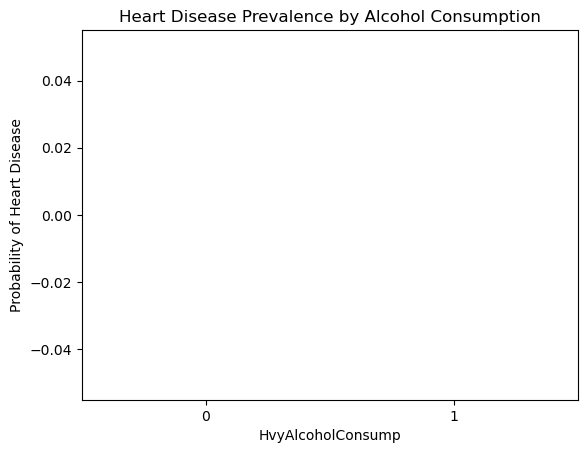

In [214]:
sns.barplot(x='HvyAlcoholConsump', y='HeartDiseaseorAttack', 
            data=df.groupby('HvyAlcoholConsump')['HeartDiseaseorAttack']
                 .apply(lambda x: (x == 'Yes').mean())
                 .reset_index(), palette='viridis')
plt.title("Heart Disease Prevalence by Alcohol Consumption")
plt.ylabel("Probability of Heart Disease")
plt.savefig('../plots/alcohol_vs_heart_disease.png', dpi=300, bbox_inches="tight")
plt.show()

### B. For Numerical Variables (Box Plots)

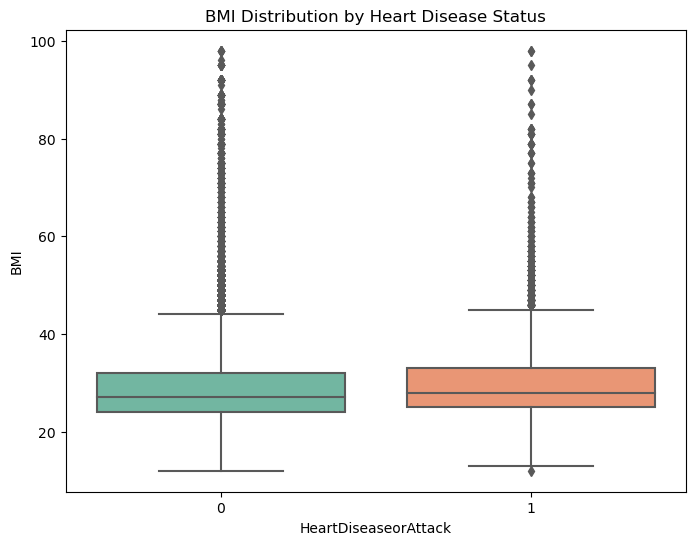

In [193]:
import os
plt.figure(figsize=(8, 6))
sns.boxplot(x="HeartDiseaseorAttack", y="BMI", data=df, palette="Set2")
plt.title("BMI Distribution by Heart Disease Status")
plt.savefig('../plots/bmi_vs_heart_disease.png', dpi=300, bbox_inches="tight")
plt.show()

### C. Correlateion Heatmap

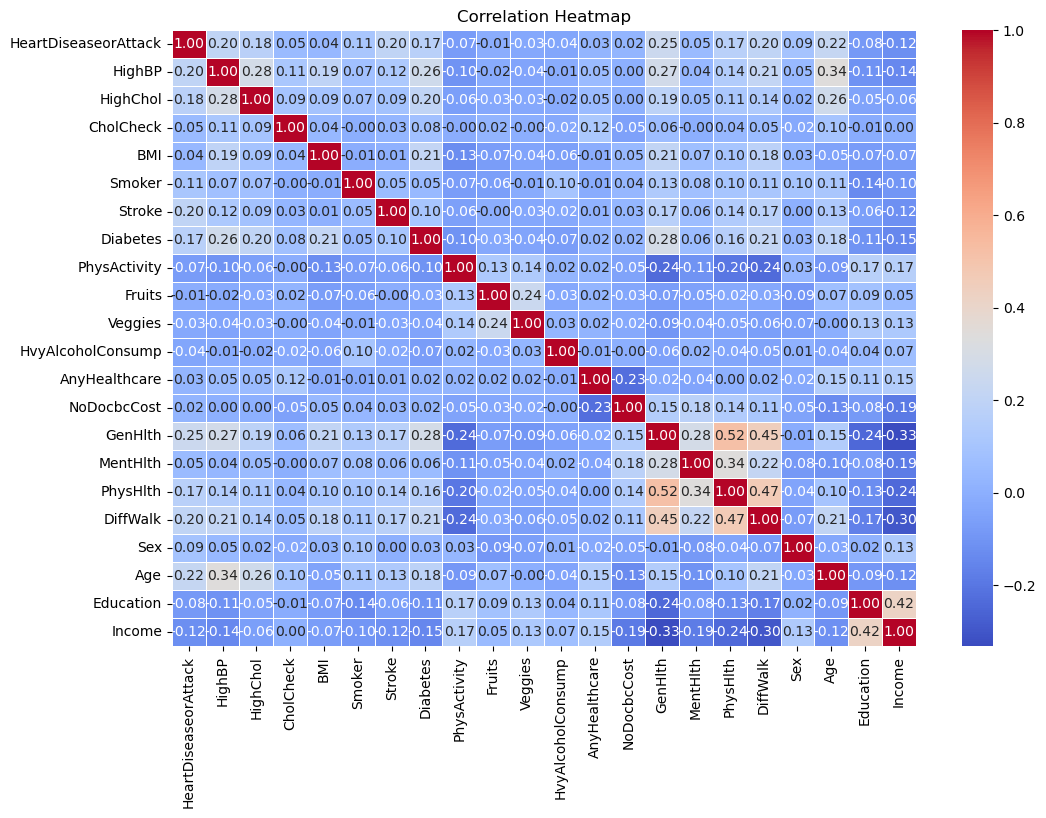

In [196]:
# Convert categorical variables to numerical for correlation
df_numeric = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('..\plots\correlation_heatmap.png', dpi=500, bbox_inches="tight")
plt.show()

In [198]:
df.to_csv('../data/heart_disease_health_indicators_cleaned.csv')